In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


In [2]:
import torch.backends
import torch.backends.mps


if torch.cuda.is_available():
    device="cuda"
elif torch.backends.mps.is_available():
    device=torch.device("mps")
else:
    device="cpu"
print(f"Using Device={device}")

Using Device=mps


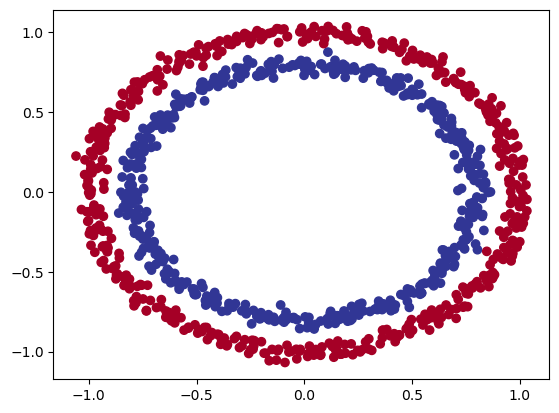

In [3]:
n_samples=1000
X, y=make_circles(n_samples=n_samples, noise=0.03, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [4]:
from sklearn.model_selection import train_test_split
print(f"Before :{type(X)} and {type(y)}")
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
print(f"After :{type(X)} and {type(y)}")


Before :<class 'numpy.ndarray'> and <class 'numpy.ndarray'>
After :<class 'torch.Tensor'> and <class 'torch.Tensor'>


In [5]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

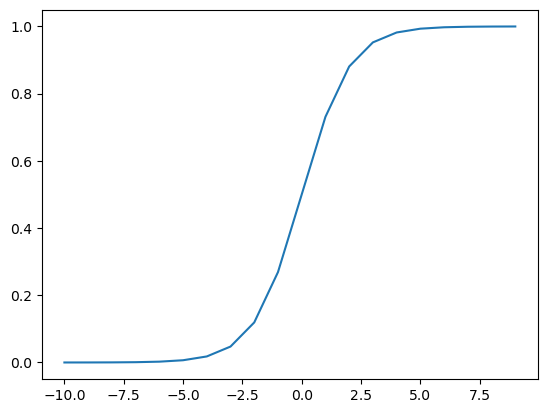

In [6]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
# print(sigmoid(10))
# print(sigmoid(10))
# print(sigmoid(10))
x=range(-10,10)
y=[sigmoid(val) for val in x]
plt.plot(x,y)

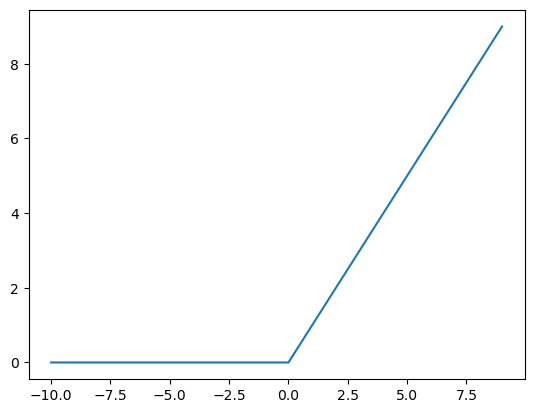

In [7]:
import numpy as np
def RELU(x):
    if(x<=0):
        return 0
    else:
        return x
    # return 1/(1+np.exp(-x))
# print(sigmoid(10))
# print(sigmoid(10))
# print(sigmoid(10))
x=range(-10,10)
y=[RELU(val) for val in x]
plt.plot(x,y);

In [8]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2, out_features=10)
        self.layer_2=nn.Linear(in_features=10, out_features=10)
        self.layer_3=nn.Linear(in_features=10, out_features=1)
        self.relu=nn.ReLU()


    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

    

In [9]:
model_0=CircleModel()
model_0.to(device)
next(model_0.parameters()).device

device(type='mps', index=0)

In [10]:
model_0.state_dict()


OrderedDict([('layer_1.weight',
              tensor([[-0.5355, -0.0793],
                      [-0.3370, -0.4284],
                      [ 0.1068,  0.0900],
                      [-0.1948, -0.3490],
                      [ 0.0686, -0.2740],
                      [-0.6499, -0.5996],
                      [-0.4542,  0.1452],
                      [-0.6151, -0.2770],
                      [ 0.2708,  0.0665],
                      [-0.3952,  0.6651]], device='mps:0')),
             ('layer_1.bias',
              tensor([ 0.4572,  0.3293,  0.4611, -0.1142,  0.0329,  0.6534,  0.6080, -0.2025,
                      -0.0451, -0.5639], device='mps:0')),
             ('layer_2.weight',
              tensor([[-0.1357, -0.0041, -0.1605, -0.1038,  0.2262, -0.1020, -0.0260,  0.2656,
                        0.2864,  0.1319],
                      [-0.1967,  0.1450,  0.0832,  0.1066, -0.1197,  0.1193,  0.1729, -0.0526,
                       -0.0120, -0.1997],
                      [-0.0952, -0.2946,

In [11]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(
    params=model_0.parameters(), lr=0.1
)

In [12]:
def accuracy_fn(y_true, y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc

In [20]:
epochs=100
torch.manual_seed(42)
trainLossList=[]
testLossList=[]
X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

for epoch in range(epochs):
    ## Training
    model_0.train()
    
    #1. Forward Pass
    y_logits=model_0(X_train).squeeze()
    y_preds=torch.round(torch.sigmoid(y_logits))
    
    #2. Compute training loss
    loss=loss_fn(y_logits, y_train)

    #3. Zero grad the optimizer
    optimizer.zero_grad()

    
    #4.Loss Backwards ->Backpropagate
    loss.backward()
    
    #5.step the optimizer
    optimizer.step()
    
    ##Accuracy test
    acc=accuracy_fn(y_true=y_train, y_pred=y_preds)
    
    ###Testing
    model_0.eval()
    with torch.inference_mode():
        test_logits=model_0(X_test).squeeze()
        test_preds=torch.round(torch.sigmoid(test_logits))
        test_loss=loss_fn(test_logits, y_test)
        test_acc=accuracy_fn(y_true=y_test, y_pred=test_preds)
        
        
    if epochs%10==0:
        print(f"Epoch={epoch} | Train loss={loss:.4f} | Train acc={acc}| test loss={loss:.4f} | Test acc={test_acc} ")
    
    trainLossList.append(loss.cpu().detach().numpy())
    testLossList.append(test_loss.cpu().detach().numpy())
        

Epoch=0 | Train loss=0.0031 | Train acc=100.0| test loss=0.0031 | Test acc=100.0 
Epoch=1 | Train loss=0.0031 | Train acc=100.0| test loss=0.0031 | Test acc=100.0 
Epoch=2 | Train loss=0.0031 | Train acc=100.0| test loss=0.0031 | Test acc=100.0 
Epoch=3 | Train loss=0.0031 | Train acc=100.0| test loss=0.0031 | Test acc=100.0 
Epoch=4 | Train loss=0.0031 | Train acc=100.0| test loss=0.0031 | Test acc=100.0 
Epoch=5 | Train loss=0.0031 | Train acc=100.0| test loss=0.0031 | Test acc=100.0 
Epoch=6 | Train loss=0.0031 | Train acc=100.0| test loss=0.0031 | Test acc=100.0 
Epoch=7 | Train loss=0.0031 | Train acc=100.0| test loss=0.0031 | Test acc=100.0 
Epoch=8 | Train loss=0.0031 | Train acc=100.0| test loss=0.0031 | Test acc=100.0 
Epoch=9 | Train loss=0.0031 | Train acc=100.0| test loss=0.0031 | Test acc=100.0 
Epoch=10 | Train loss=0.0031 | Train acc=100.0| test loss=0.0031 | Test acc=100.0 
Epoch=11 | Train loss=0.0031 | Train acc=100.0| test loss=0.0031 | Test acc=100.0 
Epoch=12 | Tra

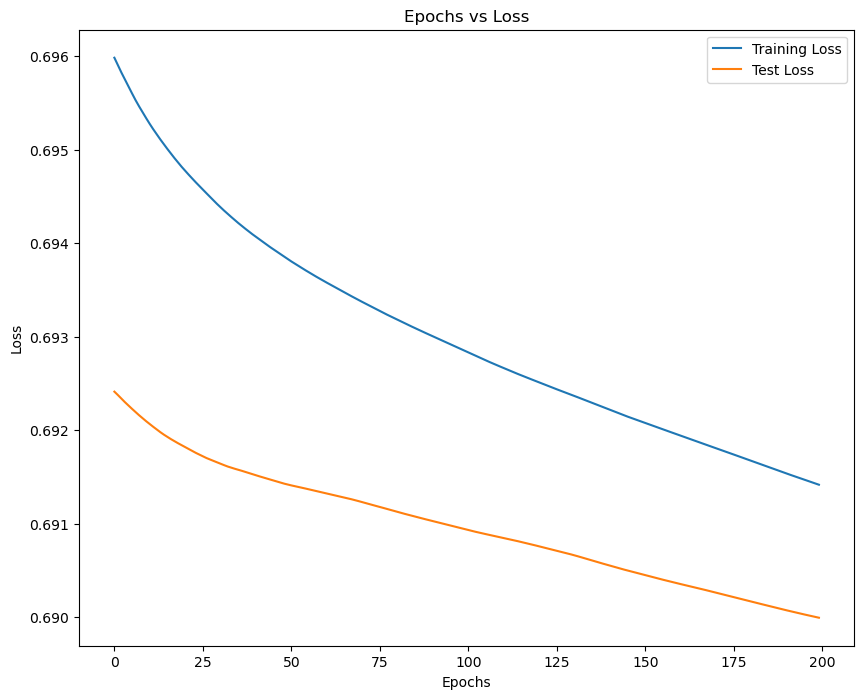

In [14]:
# Plot Loss Curve
plt.figure(figsize=(10,8))
plt.plot(range(epochs), trainLossList, label="Training Loss")
plt.plot(range(epochs), testLossList, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend();

In [15]:
model_0.eval()
with torch.inference_mode():
    y_preds=torch.round(torch.sigmoid(model_0(X_test))).squeeze()
    
print(y_preds)

tensor([1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
        1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
        0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
        1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
        1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
        1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
        1., 0.], device='mps:0')


In [16]:
from helper_functions import plot_decision_boundry
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training Data")

ImportError: cannot import name 'plot_decision_boundry' from 'helper_functions' (/Users/doctor/Documents/CampusAI/ml_class/helper_functions.py)